# Property_Price_Train

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## 1) Problem Statment :- 

#### The problem statement is to predict the sale price of a house, given the features of the                                      house. The features are the columns in the dataset, and the target variable is the                                                            SalePrice column. The problem is a  'Linear Regression' problem, as the target variable                                                is continuous.

## 2) Get the data

In [2]:
ppt = pd.read_csv(r"C:\Users\jadha\Downloads\Property_Price_Train.csv")

In [3]:
ppt.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3) Data Preprocessing

In [4]:
ppt.shape

(1459, 81)

In [5]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [6]:
ppt.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64

#### There are some null values present in our data so we need to replace the null values.We will replace numerical data null values with mean and categorical data null values with mode

##### Check more than 40% null value present in colume. Drop the columns which are having more then 40% null values.

In [7]:
len(ppt.isnull().sum()[ppt.isnull().sum()>0])

19

In [8]:
ppt.isnull().sum()[ppt.isnull().sum()*100/ppt.shape[0]>40]  #With the help of this code i got more than 40% null value present column

Lane_Type                1368
Brick_Veneer_Type         871
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [9]:
ppt = ppt.drop(['Lane_Type','Brick_Veneer_Type','Fireplace_Quality','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis = 1)

In [10]:
ppt.shape

(1459, 75)

In [11]:
ppt.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 75, dtype: int64

##### Fill up null values 

In [12]:
ppt.Lot_Extent.value_counts()

Lot_Extent
60.0     143
70.0      70
80.0      69
50.0      57
75.0      52
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64

In [13]:
ppt.Brick_Veneer_Area.value_counts()

Brick_Veneer_Area
0.0      860
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 327, dtype: int64

In [14]:
ppt.Basement_Height.value_counts()

Basement_Height
TA    648
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [15]:
ppt.Basement_Condition.value_counts()

Basement_Condition
TA    1310
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [16]:
ppt.Exposure_Level.value_counts()

Exposure_Level
No    952
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [17]:
ppt.BsmtFinType1.value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: count, dtype: int64

In [18]:
ppt.BsmtFinType2.value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      45
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [19]:
ppt.Electrical_System.value_counts()

Electrical_System
SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [20]:
ppt.Garage.value_counts()

Garage
Attchd     869
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2TFes        5
2Types       1
Name: count, dtype: int64

In [21]:
ppt.Garage_Built_Year.value_counts()

Garage_Built_Year
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [22]:
ppt.Garage_Finish_Year.value_counts()

Garage_Finish_Year
Unf    605
RFn    422
Fin    351
Name: count, dtype: int64

In [23]:
ppt.Garage_Quality.value_counts()

Garage_Quality
TA    1310
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [24]:
ppt.Garage_Condition.value_counts()

Garage_Condition
TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [25]:
ppt.Lot_Extent =ppt.Lot_Extent.fillna(ppt.Lot_Extent.mean())
ppt.Brick_Veneer_Area =ppt.Brick_Veneer_Area.fillna(ppt.Brick_Veneer_Area.mean())
ppt.Basement_Height =ppt.Basement_Height.fillna("TA")
ppt.Basement_Condition = ppt.Basement_Condition.fillna("TA")
ppt.Exposure_Level = ppt.Exposure_Level.fillna("No")
ppt.BsmtFinType1 = ppt.BsmtFinType1.fillna("Unf")
ppt.BsmtFinType2 = ppt.BsmtFinType2.fillna("Unf")
ppt.Electrical_System = ppt.Electrical_System.fillna("SBrkr")
ppt.Garage = ppt.Garage.fillna("Attchd")
ppt.Garage_Built_Year = ppt.Garage_Built_Year.fillna(ppt.Garage_Built_Year.mean())
ppt.Garage_Finish_Year = ppt.Garage_Finish_Year.fillna("Unf")
ppt.Garage_Quality = ppt.Garage_Quality.fillna("TA")
ppt.Garage_Condition =ppt.Garage_Condition.fillna("TA")


In [26]:
ppt.isnull().sum()

Id                0
Building_Class    0
Zoning_Class      0
Lot_Extent        0
Lot_Size          0
                 ..
Month_Sold        0
Year_Sold         0
Sale_Type         0
Sale_Condition    0
Sale_Price        0
Length: 75, dtype: int64

##### Drop unique column 

In [27]:
ppt= ppt.iloc[: , 1::]

In [28]:
ppt.shape

(1459, 74)

In [29]:
ppt.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,...,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,...,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,...,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,...,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,...,21.788818,0,0,0,0,12,2008,WD,Normal,250000


##### LabelEncoder :- It's use to convert object data type into numeric.

In [30]:
from sklearn.preprocessing import LabelEncoder 

In [31]:
le = LabelEncoder()

In [32]:
ppt[ppt.select_dtypes(include = ["object"]).columns] = ppt[ppt.select_dtypes(include = ["object"]).columns].apply(le.fit_transform)

In [33]:
ppt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Building_Class             1459 non-null   int64  
 1   Zoning_Class               1459 non-null   int32  
 2   Lot_Extent                 1459 non-null   float64
 3   Lot_Size                   1459 non-null   int64  
 4   Road_Type                  1459 non-null   int32  
 5   Property_Shape             1459 non-null   int32  
 6   Land_Outline               1459 non-null   int32  
 7   Utility_Type               1459 non-null   int32  
 8   Lot_Configuration          1459 non-null   int32  
 9   Property_Slope             1459 non-null   int32  
 10  Neighborhood               1459 non-null   int32  
 11  Condition1                 1459 non-null   int32  
 12  Condition2                 1459 non-null   int32  
 13  House_Type                 1459 non-null   int32

## 4)  Sampling :- 

#### Divide data into Train & Test.

In [34]:
from sklearn.model_selection import train_test_split

In [68]:
ppt=df1     # Part of outlayer

In [69]:
ppt_train,ppt_test = train_test_split(ppt,test_size=.25)

In [70]:
ppt_test.shape

(349, 74)

In [71]:
ppt_train

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,...,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
1176,20,3,37.000000,6951,1,0,3,0,1,0,...,115.044566,0,0,0,0,10,2008,8,4,119500
208,60,3,70.045833,14364,1,0,2,0,4,1,...,-35.882419,0,154,0,0,4,2007,8,4,277000
139,60,3,65.000000,15426,1,0,3,0,4,0,...,88.642988,0,0,0,0,8,2009,8,4,231500
49,20,3,66.000000,7742,1,3,3,0,4,0,...,25.625194,0,0,0,0,1,2007,8,4,127000
717,20,3,80.000000,10000,1,3,3,0,4,0,...,-38.179183,0,0,0,0,11,2008,8,4,157000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151,20,3,134.000000,17755,1,3,3,0,4,0,...,30.555079,0,100,0,0,11,2006,8,4,149900
969,190,3,75.000000,10382,1,3,3,0,4,0,...,97.436074,0,0,0,0,3,2006,3,4,140000
862,20,3,81.000000,9672,1,3,3,0,0,0,...,106.837707,0,0,0,0,5,2010,8,4,152000
93,190,0,60.000000,7200,1,3,3,0,0,0,...,-65.582399,0,99,0,0,11,2007,8,4,133900


##### Define the data into x & y 

In [72]:
ppt_train_x = ppt_train.iloc[:,0:-1]
ppt_train_y = ppt_train.iloc[:,-1]

In [73]:
ppt_test_x = ppt_test.iloc[:,0:-1]
ppt_test_y = ppt_test.iloc[:,-1]

## 5) Model Building:-

#### We are building a linear regression model in this project. 

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr = LinearRegression()

In [76]:
lr.fit(ppt_train_x,ppt_train_y)

LinearRegression()

#### Prediction

In [77]:
pred_train = lr.predict(ppt_train_x)
pred_test = lr.predict(ppt_test_x)

In [78]:
pred_train.shape

(1047,)

In [79]:
pred_test.shape

(349,)

In [80]:
error_test = ppt_test_y - pred_test
error_test

829    -19048.129011
965    -11776.588846
90       5251.589016
1058    16861.719262
1290    26025.214680
            ...     
757      6606.558365
1328     9990.834873
1396   -36352.539138
212     20033.164444
1141    -2974.526022
Name: Sale_Price, Length: 349, dtype: float64

## Model Evaluation:- 

### Evaluation parameters in Linear Regression model are: 
#### a)Rsquare.

#### b)Adjusted Rsquare.

#### c)MSE(Mean Square Error).

#### d)RMSE(Root Mean Square Error).

#### e)MAPE(Mean Absolute Percentage Error).

In [81]:
Rsquare = lr.score(ppt_train_x,ppt_train_y)
Rsquare

0.8569499606571723

In [82]:
N = ppt_train_x.shape[0]
K = ppt_train_x.shape[1]

In [83]:
adj_Rsquare = 1-(1-Rsquare)*(N-1)/(N-K-1)
adj_Rsquare

0.8462175322172685

In [84]:
mse = np.mean(np.square(error_test))
mse

515048145.4063852

In [85]:
rmse = np.sqrt(mse)
rmse

22694.67218107336

In [86]:
mape = np.mean(np.abs(error_test*100/ppt_test_y))
mape

10.583075869449322

### Conclusion:-

#### According the evaluating parameters we get to know that our model is good.

#### Higher the Rsquare better the model. 
#### lower the MAPE better the model.



In [87]:
lr.coef_  #coef gives values of beta1,beta2.....betan

array([-1.21590860e+02, -3.97260392e+03, -1.01141190e+02,  3.41653924e-01,
        2.96764776e+04, -1.32846929e+03,  3.71672726e+03, -3.95726296e+04,
       -4.38537470e+01,  1.43855601e+04,  2.34512596e+02,  1.23823317e+02,
       -1.03842922e+04, -5.83270788e+01, -1.25956567e+03,  1.07354948e+04,
        5.65978491e+03,  2.36072112e+02,  1.31033732e+02, -2.86577867e+02,
        1.95830787e+04, -7.09406886e+02,  4.93451132e+02,  8.10818535e+00,
       -3.48109361e+03,  1.46427245e+03,  1.76943075e+03, -5.85060886e+03,
        7.23168590e+02, -2.27265361e+03, -9.45699388e+02, -1.06239819e+00,
        2.09277160e+03,  1.40341104e+01, -4.63000097e+00,  8.34171117e+00,
       -7.56309150e+02, -1.62372502e+03,  2.42275462e+03,  6.14717609e+00,
        8.84382609e+00,  1.54791016e+01, -4.22595418e+00,  2.00969736e+01,
        8.80486786e+03, -1.67116420e+03,  2.29077876e+03, -2.38426165e+03,
        1.91202857e+03, -8.30437745e+03, -6.61694943e+03,  1.86679054e+03,
        1.38364958e+03,  

In [88]:
lr.intercept_   #gives value of beta0

320354.58224732743

#### Let is check the assumption

In [89]:
err_train = ppt_train_y - pred_train

In [90]:
# Error terms are normally distributed or not

### Visual Representation

In [91]:
import matplotlib.pyplot as plt

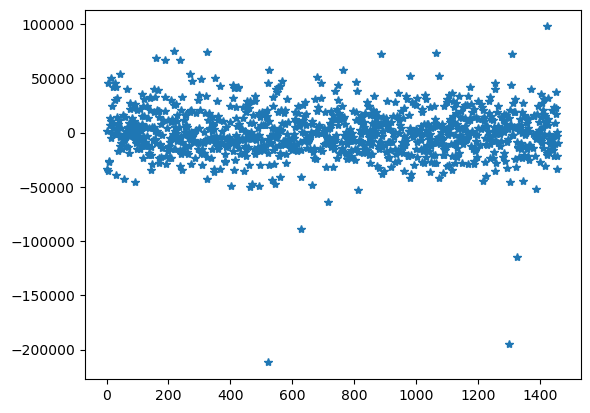

In [92]:
plt.plot(err_train,'*')

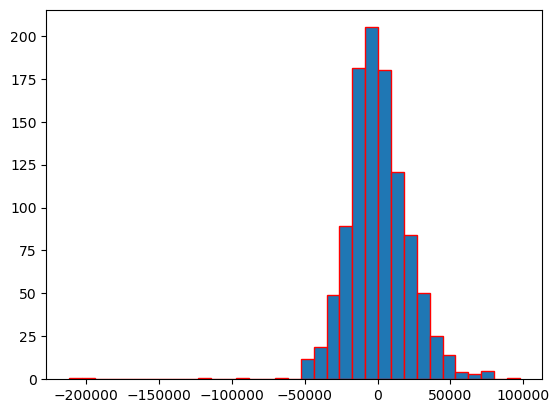

In [93]:
plt.hist(err_train, bins= 35,edgecolor="r");

In [94]:
pred_actual_df = pd.DataFrame()

In [95]:
pred_actual_df['Actual'] = ppt_train_y
pred_actual_df['Predicted'] = pred_train

In [96]:
pred_actual_df

,Actual,Predicted
1176,119500,131886.734587
208,277000,247204.631168
139,231500,198403.909446
49,127000,142218.348959
717,157000,160964.303046
...,...,...
1151,149900,160715.110969
969,140000,109248.356734
862,152000,155452.492772
93,133900,179946.740478


In [97]:
import seaborn as sns

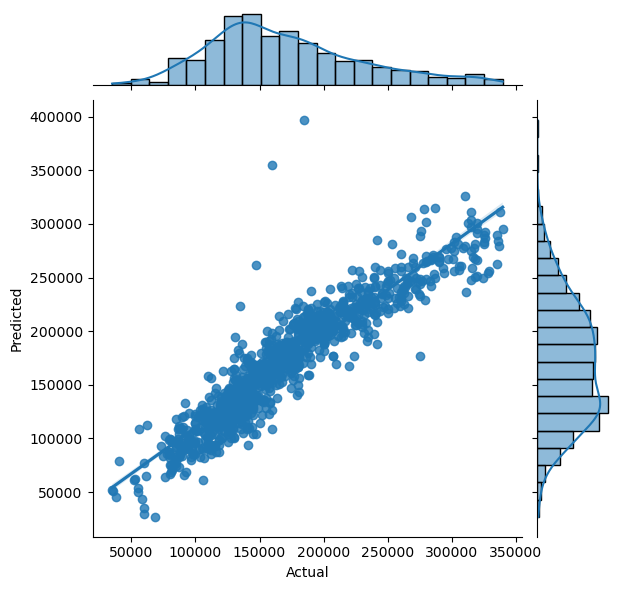

In [98]:
sns.jointplot(x="Actual",y="Predicted",data=pred_actual_df,kind="reg")

#### You've plotted histograms and joint plots to visualize the distribution of the features and their relationship with the target variable. This helps in understanding the data distribution and identifying potential outliers.

#### To remove this outliers we use remove_outlier function.

In [99]:
def remove_outlier(df,col,k):
    global df1
    mean =df[col].mean()
    sd = df[col].std()
    final_list =[x for x in df[col] if (x> mean - k*sd)]
    final_list =[x for x in final_list if (x<mean +k*sd)]
    df1 = df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-------->", df.shape[0] - df1.shape[0])

In [100]:
remove_outlier(ppt,'Sale_Price',2)

(1326, 74)
Number of outliers removed--------> 70


### Conclusion
#### After removing outliers from the data we got predicted data normally distributed.  A normally distributed set of predicted values indicates that the model is performing well and is providing reliable estimates of Sale prices.

## Final Conclusion :- 

### Based on these steps, you can conclude that your linear regression model is performing well, with a high R-squared value, low RMSE, and normally distributed predicted Sale prices. 